# 0.) Import and Clean data

In [24]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [25]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [26]:
names=df[["country"]].copy()
X=df.drop(["country"],axis=1)

In [27]:
scaler=StandardScaler().fit(X)
X_scaled=scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [28]:
kmeans=KMeans(n_clusters=5).fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 2.) Pick two features to visualize across

In [29]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

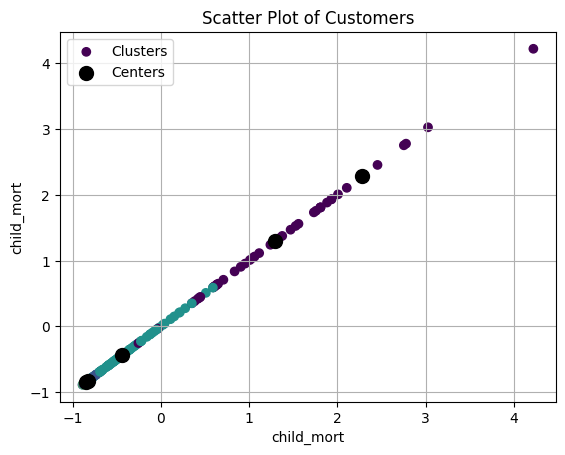

In [30]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 0


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [31]:
WCSSs=[]
ks=range(1,15)
for k in ks:
  kmeans=KMeans(n_clusters=k,n_init=30,init="random")
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

In [32]:
WCSSs

[1503.0,
 1050.2145582853307,
 831.4244352086876,
 700.3229986404376,
 628.7903934340947,
 564.0203792020267,
 512.2814355759118,
 462.75661059486356,
 429.215400846889,
 396.81827835733804,
 384.4063069588758,
 360.56628046093124,
 333.70524734429404,
 328.8079371852853]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

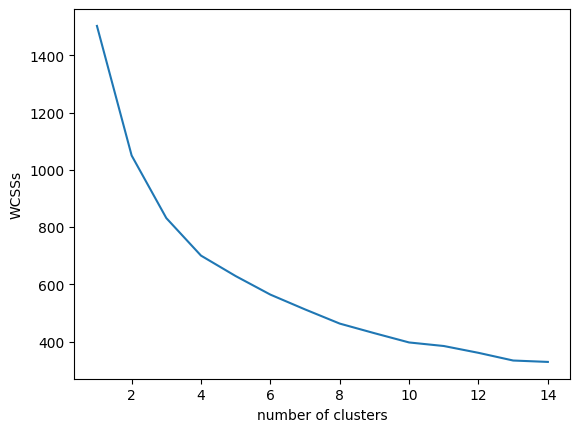

In [33]:
plt.plot(ks,WCSSs)
plt.xlabel("number of clusters")
plt.ylabel("WCSSs")
plt.show()

# 6.) Do the same for a silhoutte plot

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
SCs=[]
ks=range(2,15)
for k in ks:
  kmeans=KMeans(n_clusters=k,n_init=30,init="random")
  kmeans.fit(X_scaled)
  labs=kmeans.labels_
  SCs.append(silhouette_score(X_scaled,labs))

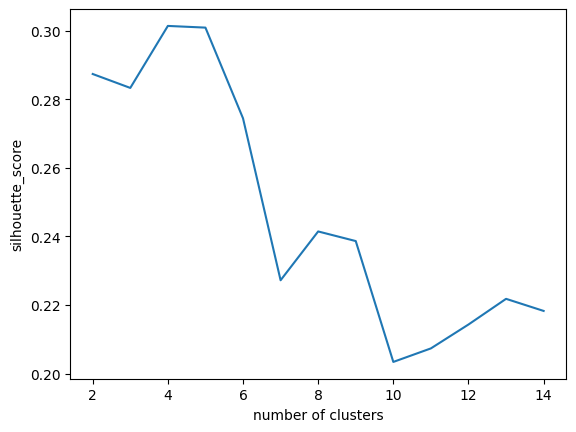

In [36]:
plt.plot(ks,SCs)
plt.xlabel("number of clusters")
plt.ylabel("silhouette_score")
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [37]:
kmeans=KMeans(n_clusters=2,n_init=30,init="random").fit(X_scaled)

In [38]:
preds=pd.DataFrame(kmeans.predict(X_scaled))

In [39]:
output=pd.concat([preds,df],axis=1)

In [40]:
output
print("Cluster 1:")
list(output.loc[output[0]==0,"country"])

Cluster 1:


['Afghanistan',
 'Angola',
 'Bangladesh',
 'Benin',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',
 'South Africa',
 'Sudan',
 'Tajikistan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Tonga',
 'Turkmenistan',
 'Uganda',
 'Uzbekistan',
 'Vanuatu',
 'Yemen',
 'Zambia']

In [41]:

print("Cluster 2:")
list(output.loc[output[0]==0])

Cluster 2:


[0,
 'country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [42]:
#### Write an observation

The observation shows how cluster analysis can be used not only to group entities like countries based on certain characteristics but also to analyze and potentially group the characteristics themselves. This dual application can provide insights into the data structure, indicating both how entities are similar and how features relate to each other, possibly revealing underlying patterns or relationships within the dataset.

#8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [43]:
output.groupby(0).std()

<ipython-input-43-96ffda24b430>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).std()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


In [44]:
output.groupby(0).mean()

<ipython-input-44-e9a27c4e94ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  output.groupby(0).mean()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


# 9.) Write an observation about the descriptive statistics.

Variability: Cluster 1 shows greater variability in metrics like child mortality and GDP per capita, indicating diverse economic and health conditions within this cluster. In contrast, Cluster 0 exhibits lower variability, suggesting more uniformity among its countries.

Means: Cluster 1 averages higher in income, life expectancy, and GDP per capita, implying it consists of more developed countries with superior economic and health status. Cluster 0, with lower averages, likely represents less developed countries.

Health Spending and Life Expectancy: The marked difference in health spending and life expectancy between clusters underscores a potential link between healthcare investment and improved health outcomes.

Economic Indicators: The significant disparity in mean income and GDP per capita between the clusters points to economic differences, with Cluster 1 possibly encompassing more affluent, developed nations.